In [215]:
import numpy as np

In [216]:
dataset = np.loadtxt('./train.csv', delimiter=',', skiprows=1)
train_data = dataset[:, 1:6]
train_labels = dataset[:, 6]

In [217]:
print(train_data, train_labels)

[[ 1.03666517  0.09143847 -0.54578685  3.4172486   3.01049196]
 [-0.39004704 -2.32877609 -0.81173789 -1.63044128 -2.69975098]
 [-0.22933895 -1.08077307  0.0365719  -4.06667655  2.19825419]
 ..., 
 [-3.48277425  0.88724861 -0.11296787  0.16936968  3.40840329]
 [-4.84094305 -0.94289605 -0.12775447 -3.59332286  0.69755961]
 [-2.9685279   0.69112619  0.22104631 -4.49092825  1.15200647]] [ 1.  1.  1. ...,  0.  0.  0.]


In [225]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

normalized_train_data = preprocessing.normalize(train_data)


In [351]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

raw_dataset = np.loadtxt('./__test.csv', delimiter=',', skiprows=1)
raw_data = raw_dataset[:, 1:6]
normalized_raw_data = preprocessing.normalize(raw_data)

print('start training')
model = KNeighborsClassifier(n_neighbors=25, metric='minkowski', p=5, weights='distance')
model.fit(train_data[:,0:3], train_labels)

start training


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=5,
           weights='distance')

In [352]:
print('start predict')
predicted = model.predict_proba(raw_data[:,0:3])

start predict


In [350]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

X_train, X_holdout, y_train, y_holdout = train_test_split(train_data[:,0:3], train_labels, test_size=0.5,
random_state=17)

# nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=25, metric='minkowski', p=5, weights='distance')

# nb.fit(X_train, y_train)
knn.fit(X_train, y_train)

# nb_pred = nb.predict(X_holdout)
# print(accuracy_score(y_holdout, nb_pred))

knn_pred = knn.predict(X_holdout)
print(roc_auc_score(y_holdout, knn_pred))
print(accuracy_score(y_holdout, knn_pred))
print(classification_report(y_holdout, knn_pred))

0.994500366923
0.994502777778
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99    159576
        1.0       1.00      0.99      1.00    200424

avg / total       0.99      0.99      0.99    360000



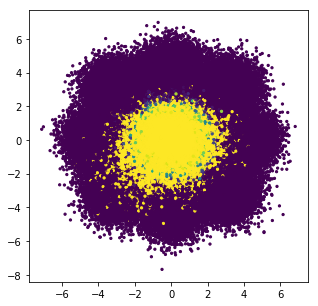

In [335]:
plt.figure(figsize=(5,5))

plt.scatter(raw_data[:,0], raw_data[:,1], s=5, c=predicted[:,1])
plt.show()

In [236]:
id_column = raw_dataset[:,0].reshape(len(raw_dataset), 1)
print(id_column)

[[  1.00000000e+00]
 [  2.00000000e+00]
 [  3.00000000e+00]
 ..., 
 [  1.79998000e+05]
 [  1.79999000e+05]
 [  1.80000000e+05]]


In [353]:
# for predict_proba
result = np.hstack((id_column, predicted[:,1].reshape(len(predicted), 1)))
np.savetxt('result.csv', result, delimiter=',', fmt='%u,%f', comments='', header='id,prob')

In [239]:
# for predict
result = np.hstack((id_column, predicted.reshape(len(predicted), 1)))
np.savetxt('result.csv', result, delimiter=',', fmt='%u,%u', comments='', header='id,prob')